## Import Dependancies

In [99]:
#scraping tools
from urllib.error import HTTPError
from datetime import datetime
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
import os
import numpy as np
import requests

# NLP tools
import pandas as pd
from collections import Counter
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

#import API key
from keys import magic_key

#viz tools
import matplotlib.pyplot as plt
import seaborn as sns

### Get YouTube Transcript (Currently Broken)

Apparently you can't scrape the transcripts the old fashioned way. 

In [ ]:
# print("Drop in the link to the youtube video.")
# url = input()

# # https://www.youtube.com/watch?v=jCZKEnThrjI

In [ ]:
# print (f'Your url is {url}')
# with request.urlopen(url) as response:
#     resp = response.read()
#     soup = bs(resp, "html.parser")
#     print("Your youtube soup is ready!")

In [ ]:
# print(soup)

In [ ]:
# #pull in title and transcript from the soup
# lil_soup = soup.find_all("div", id_="segments-container")
# print(lil_soup)

### Functions that Returns Youtube Comments
Uses the Youtube API

In [28]:
#function for getting Youtube comments with the Youtube API
def get_comments():
    
    #get the parameters url from the user and create a 
    video_url = input("Drop in the Youtube Link: ")
    print ('Got it! Thanks')
    video_id = video_url[32:] #extract the video id from the url
    # print(video_id)
    
    num_comments = input("How many comments do you what to explore? ")
    max_comments = re.sub('[^0-9]','', num_comments) #drop any letters
    print(f'{max_comments}, huh? Whatever you say boss.')
    # print(max_comments)
    
    # init API query
    base_url = f"https://www.googleapis.com/youtube/v3/commentThreads?key={magic_key}"
    params = f"&textFormat=plainText&part=snippet&videoId={video_id}&maxResults={max_comments}"
    
    #CALL API
    query_url = base_url + params
    response = requests.get(query_url).json()
    
    
    # LOOP THRU COMMENTS AND GET THAT YUMMY COMMENT TEXT
    # response['items'][10] # this is the format of a SINGLE COMM
    #raw_comment_list = response['items']

    num_comments = response['pageInfo']['totalResults'] # number of comments acutally returned from API
    counter = np.arange(0,num_comments) # create list to count thru
    print(f'We found {num_comments} comments on this video.')

    comments = []
    for c in counter:
        comment_text = response['items'][c]['snippet']['topLevelComment']['snippet']['textOriginal']
        #print(comment_text)
        #print('------------------')
        comments.append(comment_text)
        
    return comments

In [100]:
comments = get_comments()

Drop in the Youtube Link: https://www.youtube.com/watch?v=jCZKEnThrjI
Got it! Thanks
How many comments do you what to explore? 100
100, huh? Whatever you say boss.
We found 100 comments on this video.


### Functions to Determine Sentiment

In [101]:
def get_sentimental(string_list):
    sia = SentimentIntensityAnalyzer()

    #init lists
    text = []
    neg_score = []
    neu_score = []
    pos_score = []
    compound_score = []

    for string in string_list:
        siaOut = sia.polarity_scores(string)

        text.append(string)
        neg_score.append(siaOut['neg'])
        neu_score.append(siaOut['neu'])
        pos_score.append(siaOut['pos'])
        compound_score.append(siaOut['compound'])

    #     print(comment)
    #     print(siaOut)
    #     print('-------------')

    # create a dataframe of the comments and their sentiments
    df = pd.DataFrame({'text': text,
                       'neg_score': neg_score,
                       'neu_score': neu_score,
                       'pos_score': pos_score,
                       'compound_score': compound_score
                      })
    return df

In [102]:
test = get_sentimental(comments)

In [142]:
def main():
    comments = get_comments()
    df = get_sentimental(comments)
    
    return df

## Positive Comment Test

In [143]:
# test on video with positive comments
# https://www.youtube.com/watch?v=jCZKEnThrjI&t=7s (Caitlin Doughty and Chelsea Fagan Podcast)

test = main()

Drop in the Youtube Link: https://www.youtube.com/watch?v=jCZKEnThrjI&t=7s
Got it! Thanks
How many comments do you what to explore? 300
300, huh? Whatever you say boss.
We found 100 comments on this video.


In [150]:
print(f'Average Compound Score {test.compound_score.mean()}')

Average Compound Score 0.270128


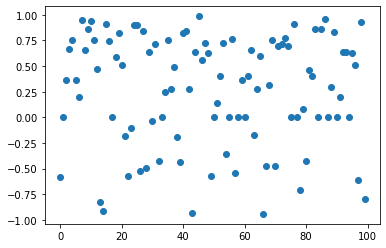

In [154]:
# scatterplot test (NOT GREAT)
plt.scatter(test.index, test.compound_score)

<AxesSubplot:xlabel='compound_score'>

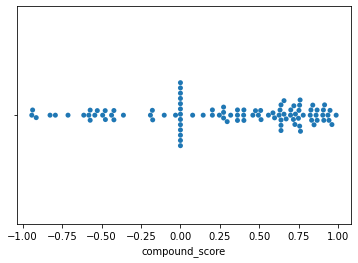

In [155]:
# swarmplot test (BETTER)
sns.swarmplot(x=test.compound_score)

<AxesSubplot:ylabel='Density'>

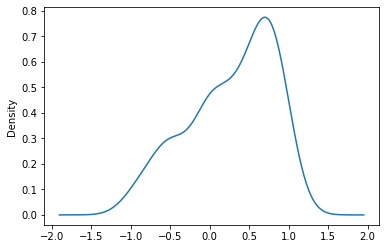

In [156]:
#density plot (WHAT IS THIS EVEN)
test.compound_score.plot(kind='density')

<AxesSubplot:xlabel='compound_score'>

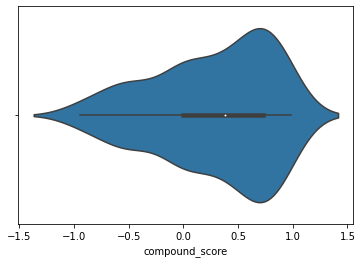

In [157]:
#violinplot test (I LIKE IT BUT NEED MORE INFO)
sns.violinplot(x=test.compound_score)

(array([ 5.,  5.,  8.,  4., 15.,  4., 12.,  8., 22., 17.]),
 array([-0.9416 , -0.74881, -0.55602, -0.36323, -0.17044,  0.02235,
         0.21514,  0.40793,  0.60072,  0.79351,  0.9863 ]),
 <BarContainer object of 10 artists>)

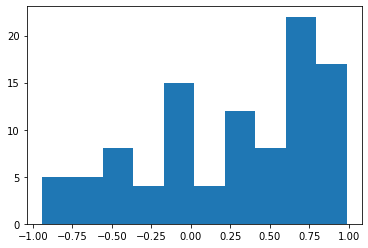

In [146]:
#histogram test
plt.hist(test.compound_score)

## Negative Comment Test

In [178]:
# test on video with positive comments
# https://www.youtube.com/watch?v=YbJOTdZBX1g&t (2018 Youtube Rewind)

test_2 = main()

Drop in the Youtube Link: https://www.youtube.com/watch?v=YbJOTdZBX1g&t
Got it! Thanks
How many comments do you what to explore? 100
100, huh? Whatever you say boss.
We found 100 comments on this video.


In [166]:
print(f'Average Compound Score {test_2.compound_score.mean()}')

Average Compound Score -0.12295499999999997


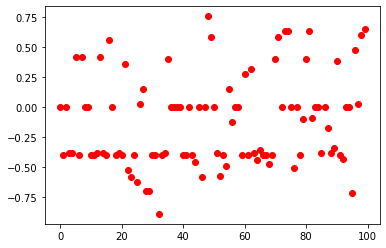

In [172]:
# scatterplot test (NOT GREAT)
plt.scatter(test_2.index, test_2.compound_score, color='r')

<AxesSubplot:xlabel='compound_score'>

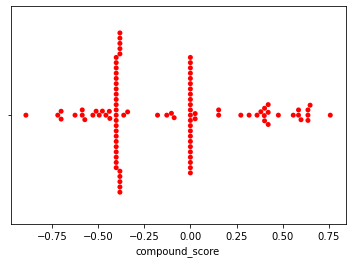

In [173]:
# swarmplot test (BETTER)
sns.swarmplot(x=test_2.compound_score, color='r')

<AxesSubplot:ylabel='Density'>

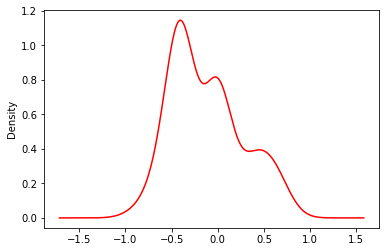

In [174]:
#density plot (WHAT IS THIS EVEN)
test_2.compound_score.plot(kind='density',color='r')

<AxesSubplot:xlabel='compound_score'>

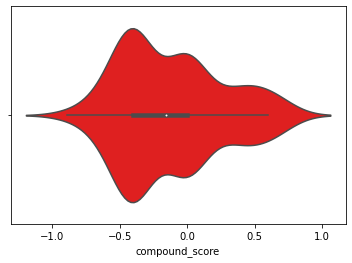

In [175]:
#violinplot test (I LIKE IT BUT NEED MORE INFO)
sns.violinplot(x=test_2.compound_score, color='r')

(array([ 1.,  7., 29., 12.,  4., 25.,  2., 10.,  4.,  6.]),
 array([-0.891  , -0.72611, -0.56122, -0.39633, -0.23144, -0.06655,
         0.09834,  0.26323,  0.42812,  0.59301,  0.7579 ]),
 <BarContainer object of 10 artists>)

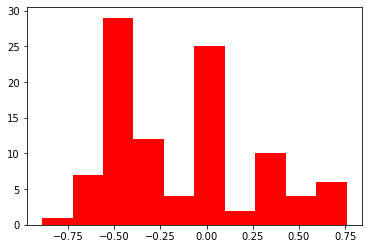

In [176]:
#histogram test
plt.hist(test_2.compound_score, color='r')

## Comparing the Two Videos

In [177]:
test['video'] = 'Money and Death Podcast'

In [181]:
test_2['video'] = '2018 Youtube Rewind'

In [183]:
compare_df = pd.concat([test,test_2])

In [191]:
compare_df['dummy'] = 0

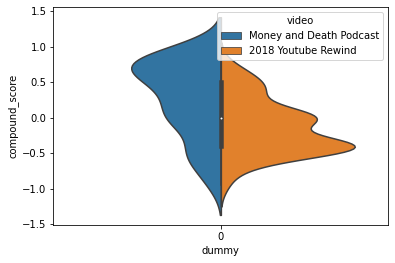

In [194]:
plot = sns.violinplot(data=compare_df, y='compound_score', split=True, hue='video', x='dummy')
picture = plot.get_figure()
picture.savefig('output.png')

### Tokenize Document

In [ ]:
file = "Resources/Corpus_Podcast"

In [ ]:
with open(file) as f:
    raw_text = f.readlines()

In [ ]:
def to_tokens(dirty_text):
    
    big_string = ' '.join(dirty_text).lower() # join and lower into big string
    big_string = re.sub(r"[^a-z0-9'\s]", '', big_string) #drop punctuation
    big_string = re.sub(r'\d+', '', big_string) # remove numbers
    
    tokens = nltk.word_tokenize(big_string) # tokenize with nltk
    print(f'Your text is now {len(tokens)} tokens.')
    
    print("Drop it like it's stop.")
    #loop thru words and strip stop words
    cleaned_words = []
    for token in tokens:
        if token not in stopwords.words('english'):
            cleaned_words.append(token)
            
    print(f'Now your text is only {len(cleaned_words)} tokens.')
    
    return tokens

In [ ]:
tokens = to_tokens(raw_text)
tokens

In [ ]:
def score_text(dirty_text):
    
    big_string = ' '.join(dirty_text).lower() # join and lower into big string
    big_string = big_string.replace('.','').replace(',','') #drop commas and periods
    
    sia = SentimentIntensityAnalyzer()
    siaOut = sia.polarity_scores(big_string)
    print(siaOut)

In [ ]:
score_text(tokens)

In [ ]:
score_text(raw_text)